1 Timestamp => Date and time when form was submitted

2 Exploratory => Does the respondent actively explore new artists/genres?

3 Mental health => 0 - I do not experience this 10 - I experience this regularly, constantly/or to an extreme.

4 Foreign Languages => Does the respondent regularly listen to music with lyrics in a language they are not fluent in?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mxmh_survey_results.csv')

In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


# Data Cleaning

**1- Dealing with NaN values**

In [5]:
data.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [6]:
#Dropping the rows that contain NaNs from the columns: 'Age', 'Primary streaming service', 'While Working', 'Instrumentalist', 'Composer', 'Foreign languages'

data.dropna(subset=['Age'], inplace=True)
data.dropna(subset=['Primary streaming service'], inplace=True)
data.dropna(subset=['While working'], inplace=True)
data.dropna(subset=['Composer'], inplace=True)
data.dropna(subset=['Instrumentalist'], inplace=True)
data.dropna(subset=['Foreign languages'], inplace=True)
data.dropna(subset=['Music effects'], inplace=True)

In [7]:
#Dropping unnecessary columns.
data.drop(columns=['Timestamp'], inplace=True)
data.drop(columns=['Exploratory'], inplace=True)
data.drop(columns=['Foreign languages'], inplace=True)
data.drop(columns=['Permissions'], inplace=True)

In [8]:
#checking BPM column 
print(data['BPM'].max())
data['BPM'].min()

999999999.0


0.0

In [9]:
print(data['BPM'].mean())
print(data['BPM'].median())
print(data['BPM'].mode())

1623500.0016233767
120.0
0    120.0
Name: BPM, dtype: float64


In [10]:
#BPM contains non realistic extreme values, so i'm going to fill NaNs with the mode (mode = median)
data['BPM'].fillna(data['BPM'].mode()[0], inplace=True)

In [11]:
data.isnull().sum()

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects                   0
dtype: int64

**2- renaming the columns**

In [12]:


current_columns = data.columns
new_columns = [column.lower().replace(' ', '_') for column in current_columns]
data.columns = new_columns
data



,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects
2,18.0,Spotify,4.0,No,No,No,Video game music,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


**3- checking for duplicates**

In [13]:
data.duplicated().sum()

0

**4- splitting dataframe into numerical and categorical**

In [14]:
#checking data dtypes
data.dtypes

age                             float64
primary_streaming_service        object
hours_per_day                   float64
while_working                    object
instrumentalist                  object
composer                         object
fav_genre                        object
bpm                             float64
frequency_[classical]            object
frequency_[country]              object
frequency_[edm]                  object
frequency_[folk]                 object
frequency_[gospel]               object
frequency_[hip_hop]              object
frequency_[jazz]                 object
frequency_[k_pop]                object
frequency_[latin]                object
frequency_[lofi]                 object
frequency_[metal]                object
frequency_[pop]                  object
frequency_[r&b]                  object
frequency_[rap]                  object
frequency_[rock]                 object
frequency_[video_game_music]     object
anxiety                         float64


In [15]:
#splitting dataframe into numerical and categorical

numdata = data.select_dtypes(exclude='object')
catdata = data.select_dtypes(include='object')

In [16]:
catdata

,primary_streaming_service,while_working,instrumentalist,composer,fav_genre,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],music_effects
2,Spotify,No,No,No,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,No effect
3,YouTube Music,Yes,No,Yes,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,Improve
4,Spotify,Yes,No,No,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,Improve
5,Spotify,Yes,Yes,Yes,Jazz,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,Improve
6,YouTube Music,Yes,Yes,No,Video game music,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Spotify,Yes,Yes,No,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,Improve
732,Spotify,Yes,Yes,No,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,Improve
733,Other streaming service,Yes,No,Yes,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Improve
734,Spotify,Yes,Yes,No,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,Improve


**5- preparing the numerical values**

<function matplotlib.pyplot.show(close=None, block=None)>

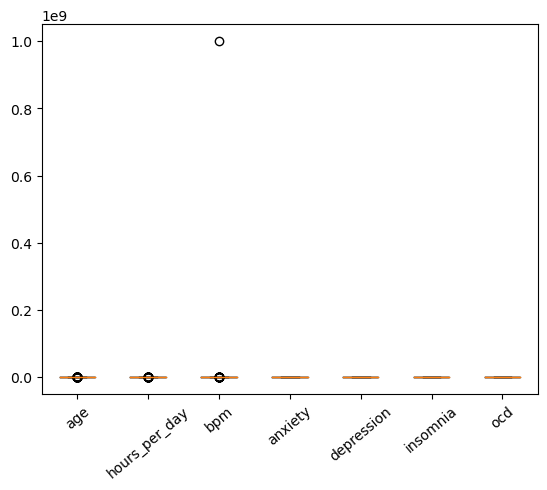

In [17]:
#checking for extreme values and outliers. 
import matplotlib.pyplot as plt

plt.boxplot(numdata)
plt.xticks(range(1, len(numdata.columns) + 1), numdata.columns, rotation=40)
plt.show

In [18]:
#removing outliers from 'bpm' 
Q1 = data['bpm'].quantile(0.25)
Q3 = data['bpm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


numdata = numdata[(numdata['bpm'] >= lower_bound) & (numdata['bpm'] <= upper_bound)]



numdata

,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0
5,18.0,5.0,86.0,8.0,8.0,7.0,7.0
6,18.0,3.0,66.0,4.0,8.0,6.0,0.0
...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

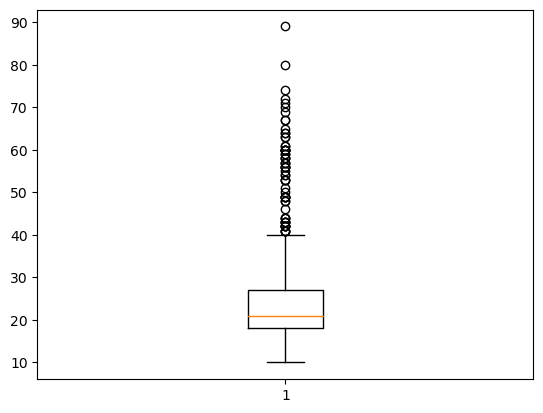

In [19]:
#checking 'age' column and removing outliers
plt.boxplot(numdata['age'])
plt.show

In [20]:
threshold_maxvalue = 75
threshold_minvalue = 12

numdata = numdata[(numdata['age'] >= threshold_minvalue) & (numdata['age'] <= threshold_maxvalue)]

<function matplotlib.pyplot.show(close=None, block=None)>

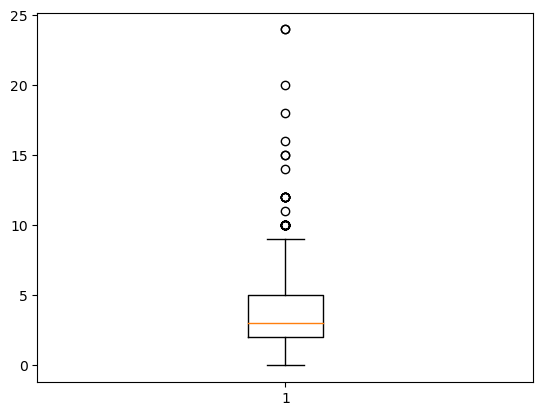

In [21]:
#checking 'hours_per_day' column and removing outliers
plt.boxplot(numdata['hours_per_day'])
plt.show

In [22]:
threshold_maxvalue = 20
threshold_minvalue = 0.05

numdata = numdata[(numdata['hours_per_day'] >= threshold_minvalue) & (numdata['hours_per_day'] <= threshold_maxvalue)]

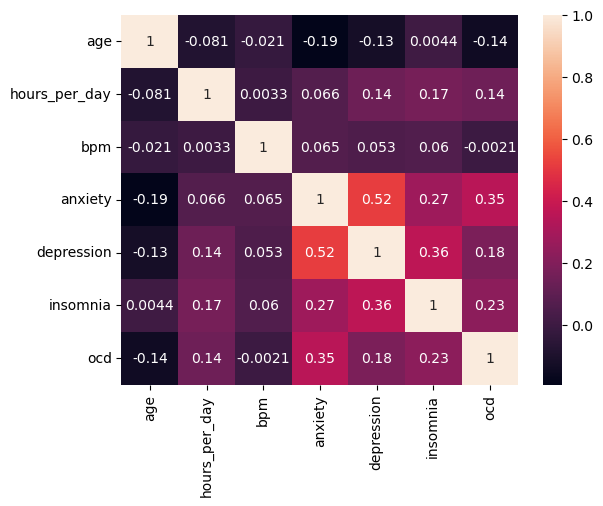

In [23]:
#viewing correlations in numdata using heatmap
ax=sns.heatmap(numdata.corr(), annot=True)
plt.show()

In [24]:
numdata

,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0
5,18.0,5.0,86.0,8.0,8.0,7.0,7.0
6,18.0,3.0,66.0,4.0,8.0,6.0,0.0
...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0


**preparing categorical values**

In [25]:
catdata['fav_genre'].value_counts(dropna=False)

fav_genre
Rock                184
Pop                 114
Metal                87
Classical            51
Video game music     43
EDM                  36
R&B                  35
Hip hop              34
Folk                 29
Country              24
Rap                  22
K pop                21
Jazz                 20
Lofi                 10
Gospel                6
Latin                 2
Name: count, dtype: int64

In [26]:
music_mh = pd.concat([numdata, catdata ], axis=1)
music_mh = music_mh.dropna()
music_mh

,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd,primary_streaming_service,while_working,instrumentalist,composer,fav_genre,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],music_effects
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,Spotify,No,No,No,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,No effect
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,YouTube Music,Yes,No,Yes,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,Improve
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,Spotify,Yes,No,No,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,Improve
5,18.0,5.0,86.0,8.0,8.0,7.0,7.0,Spotify,Yes,Yes,Yes,Jazz,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,Improve
6,18.0,3.0,66.0,4.0,8.0,6.0,0.0,YouTube Music,Yes,Yes,No,Video game music,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0,Spotify,Yes,Yes,No,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,Improve
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0,Spotify,Yes,Yes,No,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,Improve
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0,Other streaming service,Yes,No,Yes,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Improve
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0,Spotify,Yes,Yes,No,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,Improve


In [27]:
genre_mapping = {
    'Country': 'Jazz',
    'EDM': 'EDM',
    'Folk': 'Jazz',
    'Gospel': 'Jazz',
    'Hip hop': 'Hip hop',
    'Jazz': 'Jazz',
    'K pop': 'Pop',
    'Latin': 'Pop',
    'Lofi': 'Pop',
    'Metal': 'Rock',
    'Pop': 'Pop',
    'R&B': 'Hip hop',
    'Rap': 'Hip hop',
    'Rock': 'Rock',
    'Video game music': 'EDM',
    'Classical' : 'Classical'
}

catdata['fav_genre'] = catdata['fav_genre'].map(genre_mapping)
catdata

,primary_streaming_service,while_working,instrumentalist,composer,fav_genre,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],music_effects
2,Spotify,No,No,No,EDM,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,No effect
3,YouTube Music,Yes,No,Yes,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,Improve
4,Spotify,Yes,No,No,Hip hop,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,Improve
5,Spotify,Yes,Yes,Yes,Jazz,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,Improve
6,YouTube Music,Yes,Yes,No,EDM,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Spotify,Yes,Yes,No,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,Improve
732,Spotify,Yes,Yes,No,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,Improve
733,Other streaming service,Yes,No,Yes,Hip hop,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Improve
734,Spotify,Yes,Yes,No,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,Improve


In [28]:
genre_mapping1 = {
    'Spotify': 'Spotify',
    'YouTube Music': 'YouTube Music',
    'Other streaming service': 'Other',
    'Apple Music': 'Apple Music',
    'Pandora': 'Other',
    'I do not use a streaming service.': 'Other',
}

catdata['primary_streaming_service'] = catdata['primary_streaming_service'].map(genre_mapping1)
catdata

,primary_streaming_service,while_working,instrumentalist,composer,fav_genre,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],music_effects
2,Spotify,No,No,No,EDM,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,No effect
3,YouTube Music,Yes,No,Yes,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,Improve
4,Spotify,Yes,No,No,Hip hop,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,Improve
5,Spotify,Yes,Yes,Yes,Jazz,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,Improve
6,YouTube Music,Yes,Yes,No,EDM,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Spotify,Yes,Yes,No,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,Improve
732,Spotify,Yes,Yes,No,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,Improve
733,Other,Yes,No,Yes,Hip hop,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Improve
734,Spotify,Yes,Yes,No,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,Improve


In [29]:
mmh_shorts = pd.concat([numdata, catdata ], axis=1)
mmh_shorts = mmh_shorts.dropna()
mmh_shorts

,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd,primary_streaming_service,while_working,instrumentalist,composer,fav_genre,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],music_effects
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,Spotify,No,No,No,EDM,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,No effect
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,YouTube Music,Yes,No,Yes,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,Improve
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,Spotify,Yes,No,No,Hip hop,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,Improve
5,18.0,5.0,86.0,8.0,8.0,7.0,7.0,Spotify,Yes,Yes,Yes,Jazz,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,Improve
6,18.0,3.0,66.0,4.0,8.0,6.0,0.0,YouTube Music,Yes,Yes,No,EDM,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0,Spotify,Yes,Yes,No,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,Improve
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0,Spotify,Yes,Yes,No,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,Improve
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0,Other,Yes,No,Yes,Hip hop,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Improve
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0,Spotify,Yes,Yes,No,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,Improve


In [30]:
mmh_shorts.to_csv('mmh_shorts.csv', index=False)

**Building a machine learning model**

In [31]:
#transforming the numerical values using MinMax

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numdata)
X_norm = transformer.transform(numdata)
print(numdata.shape)
X_numdata_scale = pd.DataFrame(X_norm, columns=numdata.columns)
X_numdata_scale.head()


(682, 7)


,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd
0,0.096774,0.195980,0.562044,0.7,0.7,1.0,0.2
1,0.790323,0.120603,0.211679,0.9,0.7,0.3,0.3
2,0.096774,0.195980,0.379562,0.7,0.2,0.5,0.9
3,0.096774,0.246231,0.226277,0.8,0.8,0.7,0.7
4,0.096774,0.145729,0.080292,0.4,0.8,0.6,0.0


**6- preparing categorical variables**

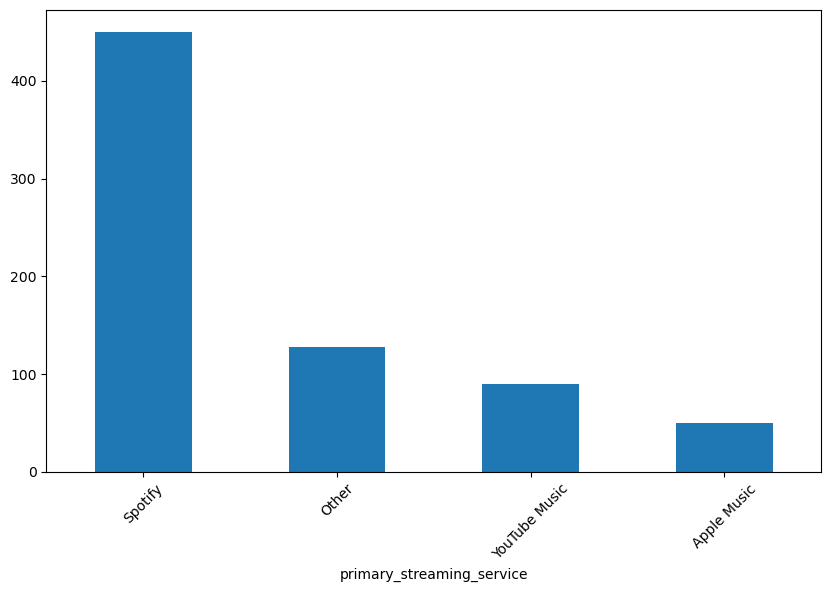

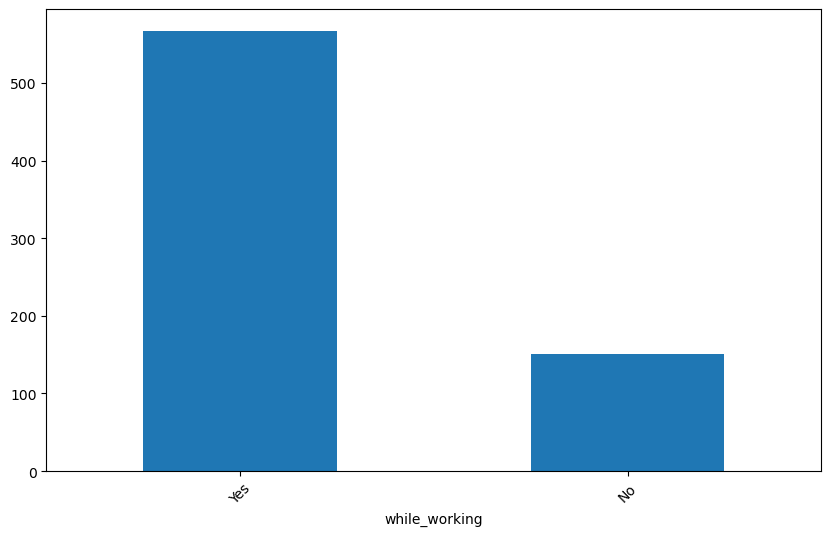

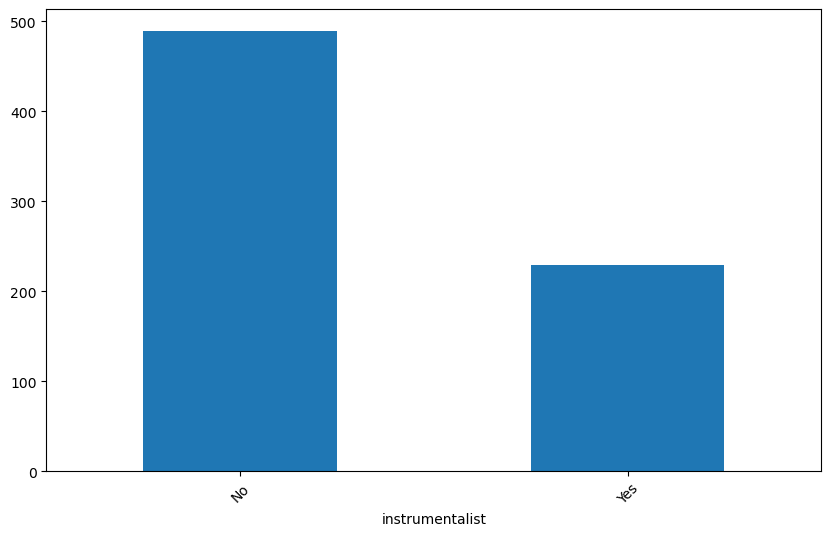

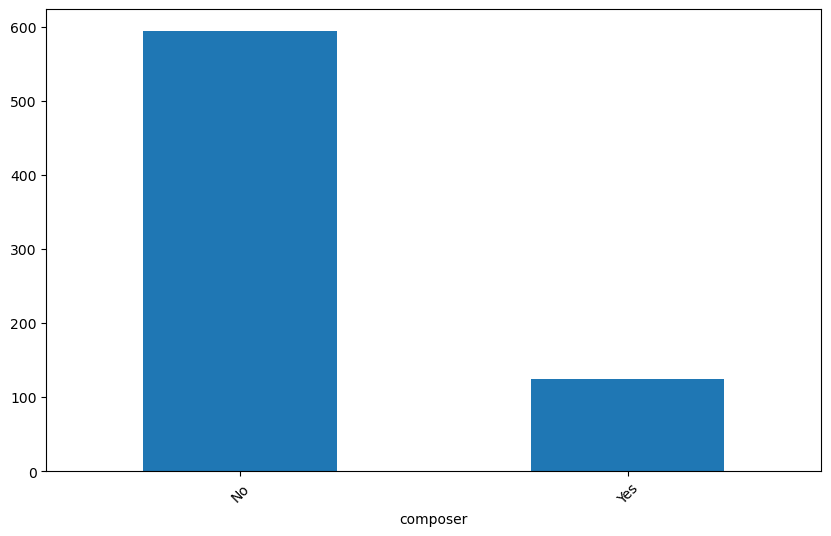

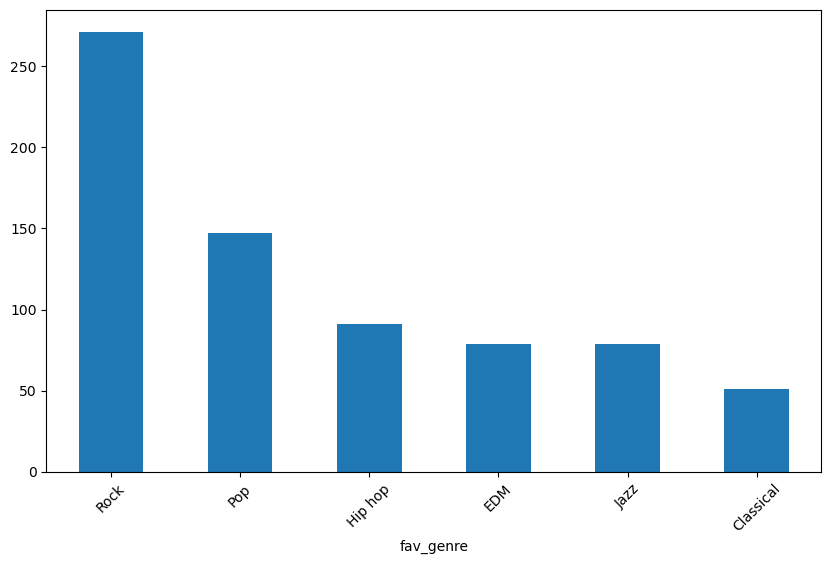

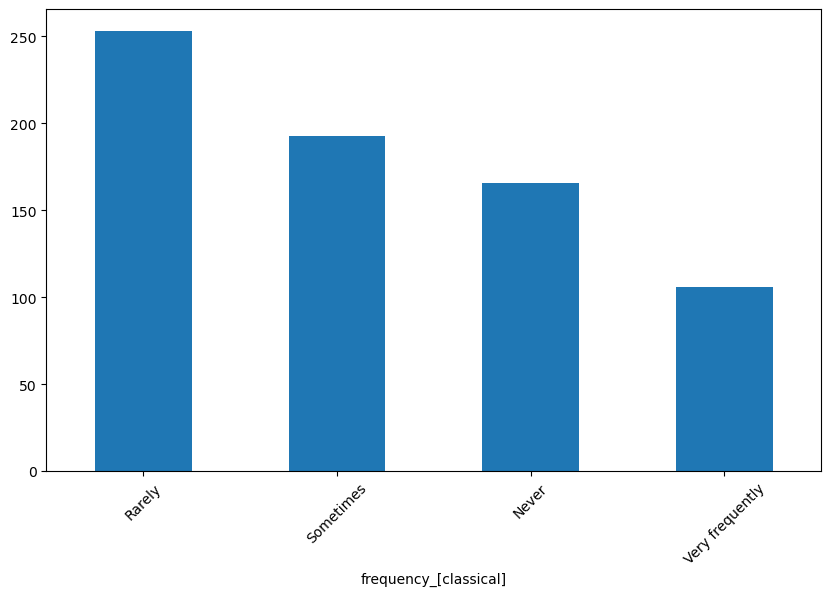

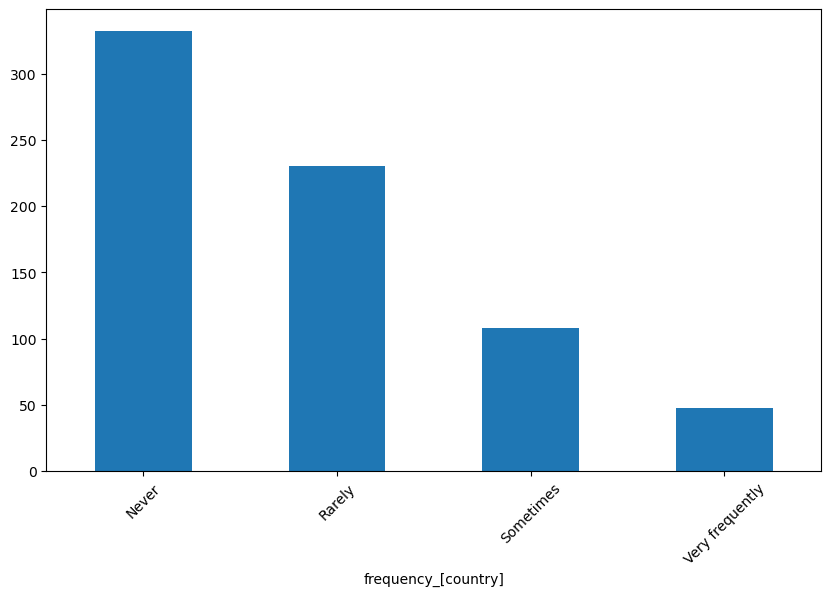

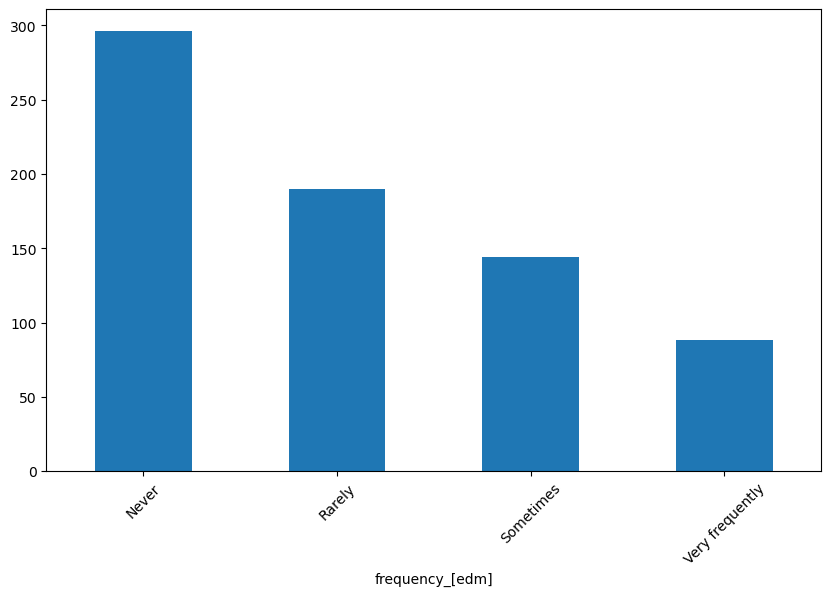

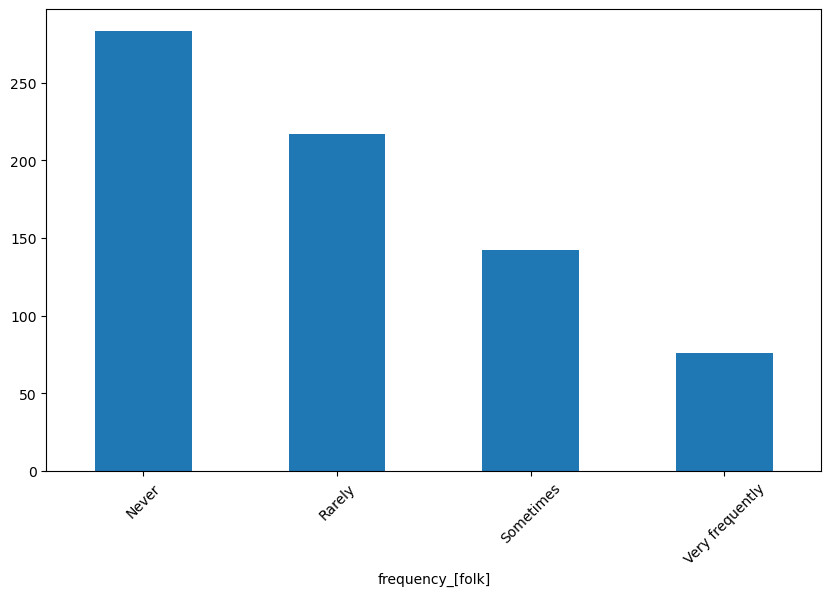

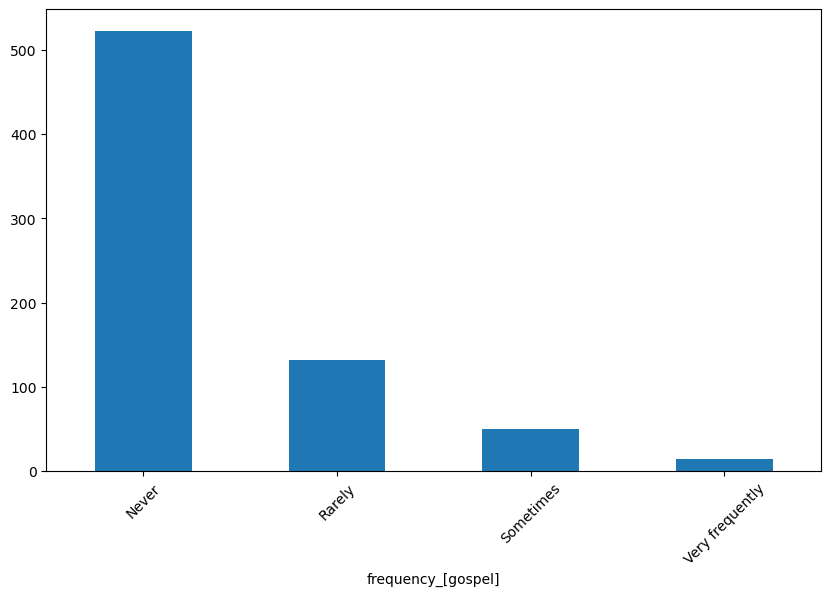

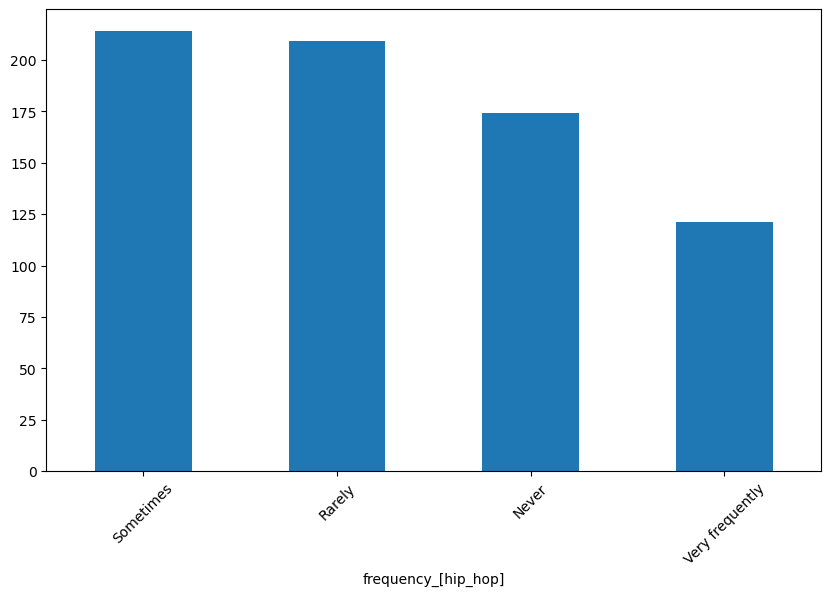

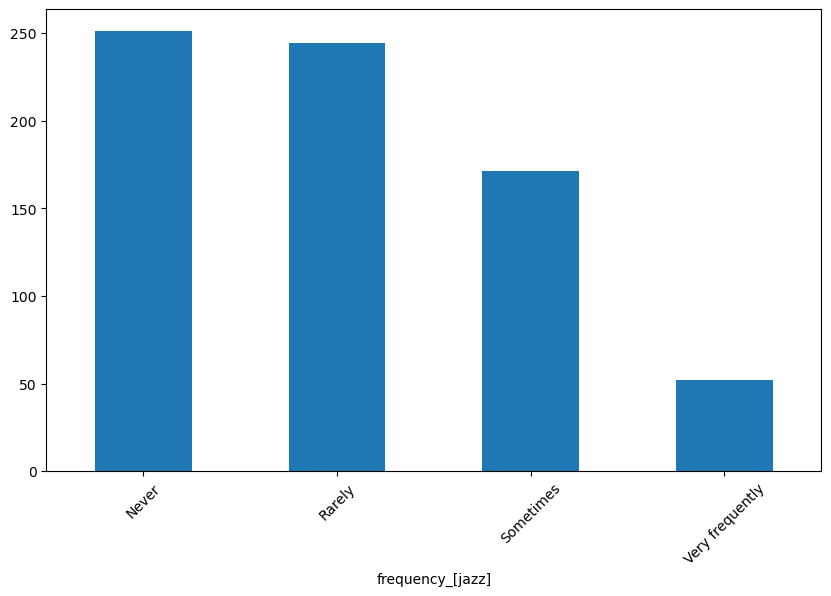

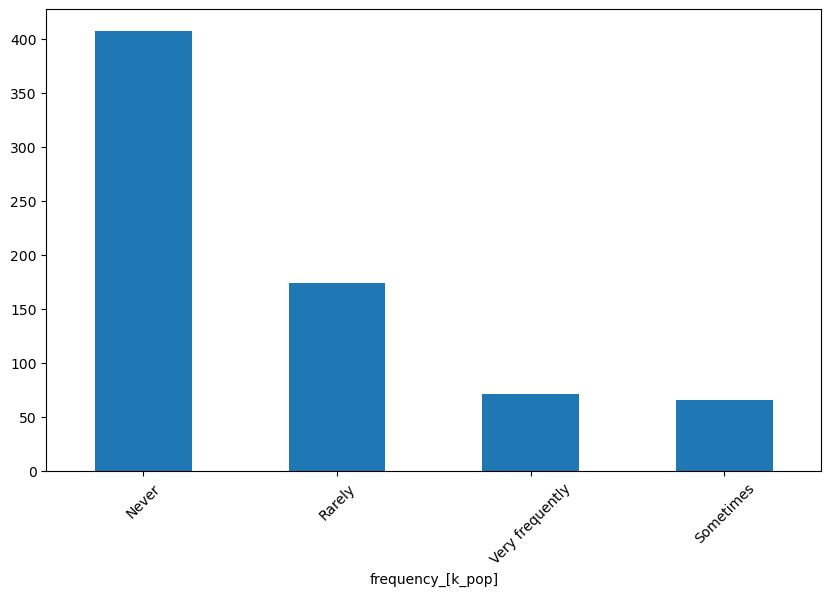

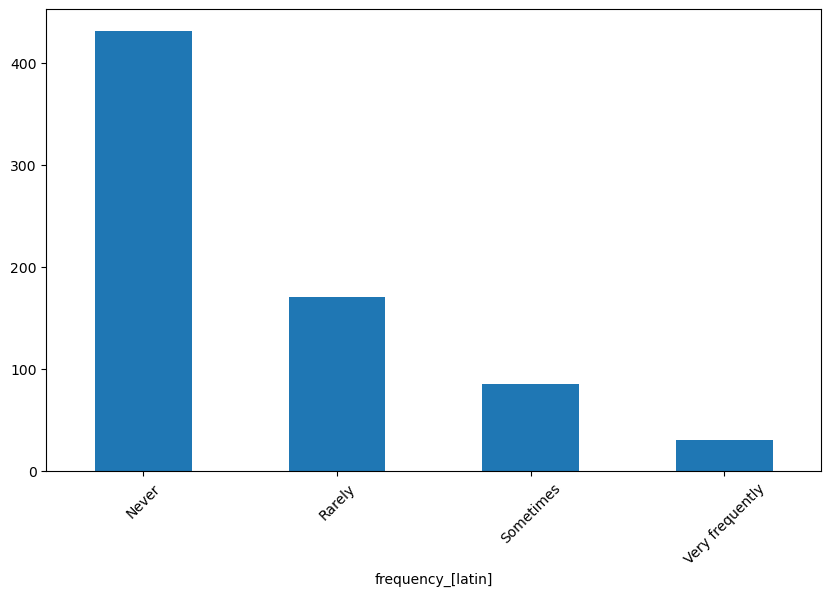

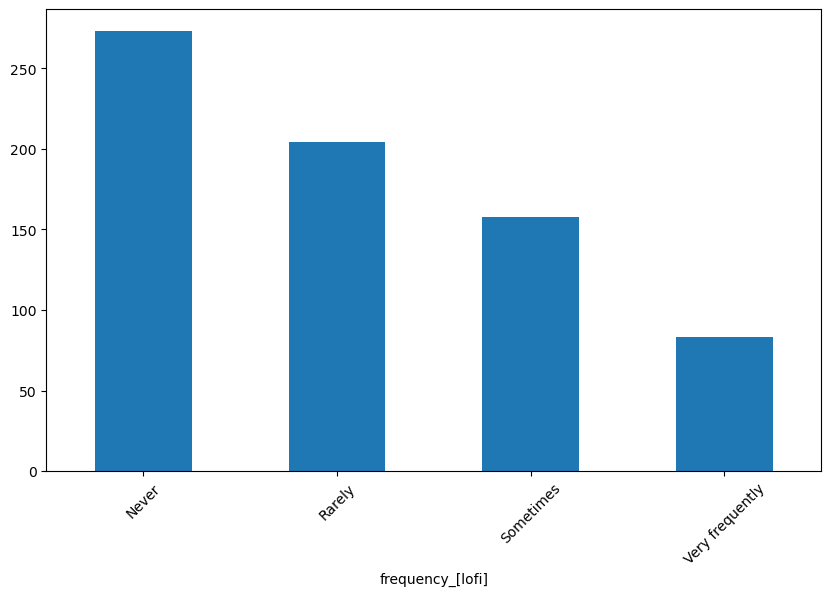

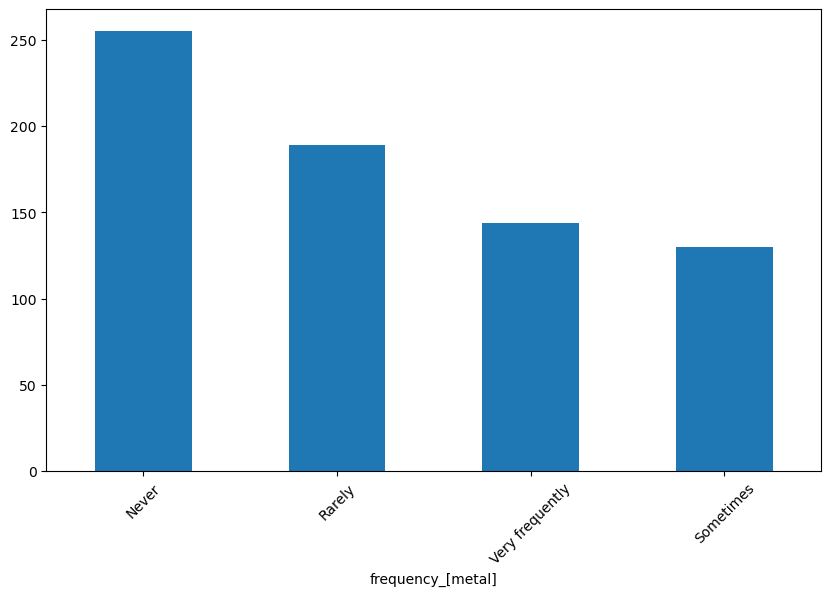

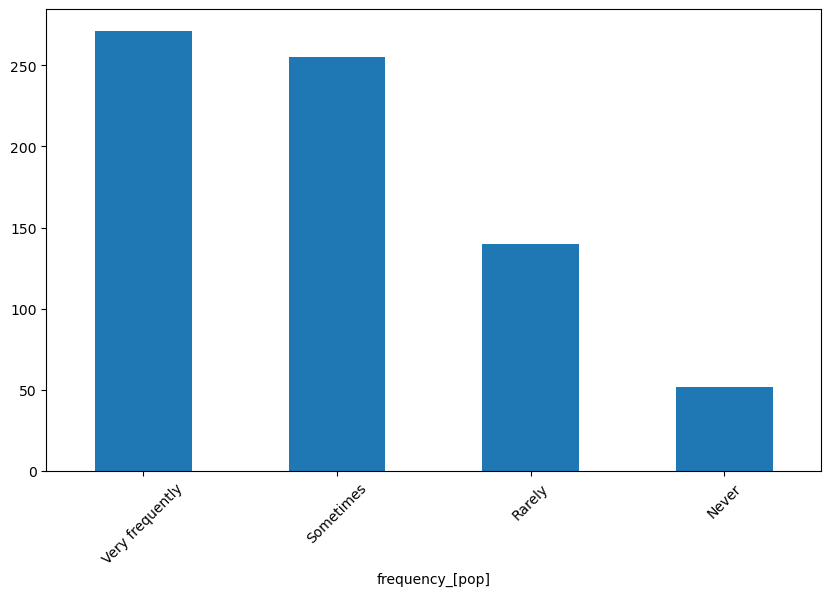

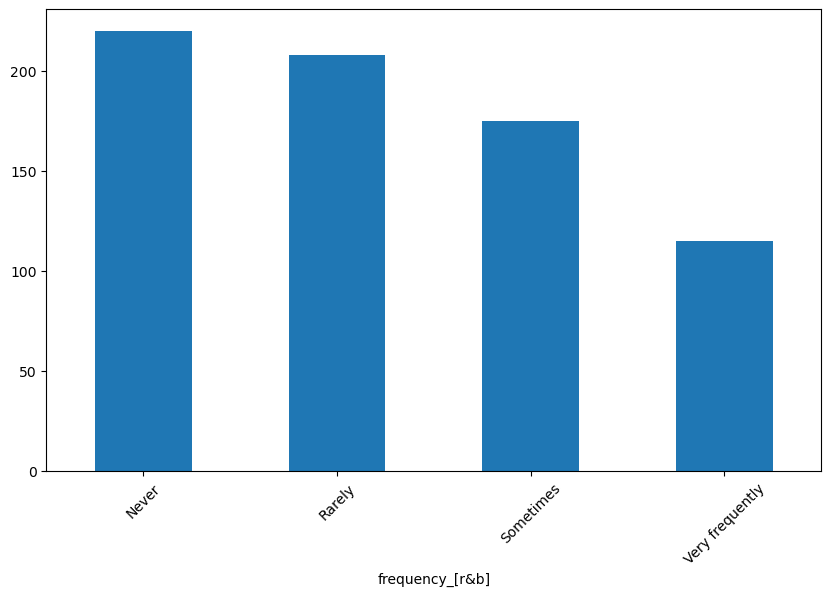

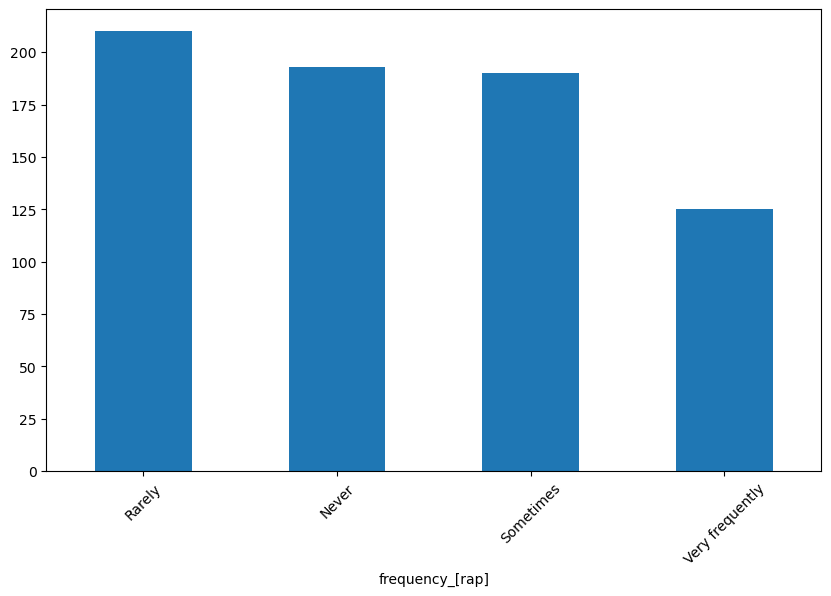

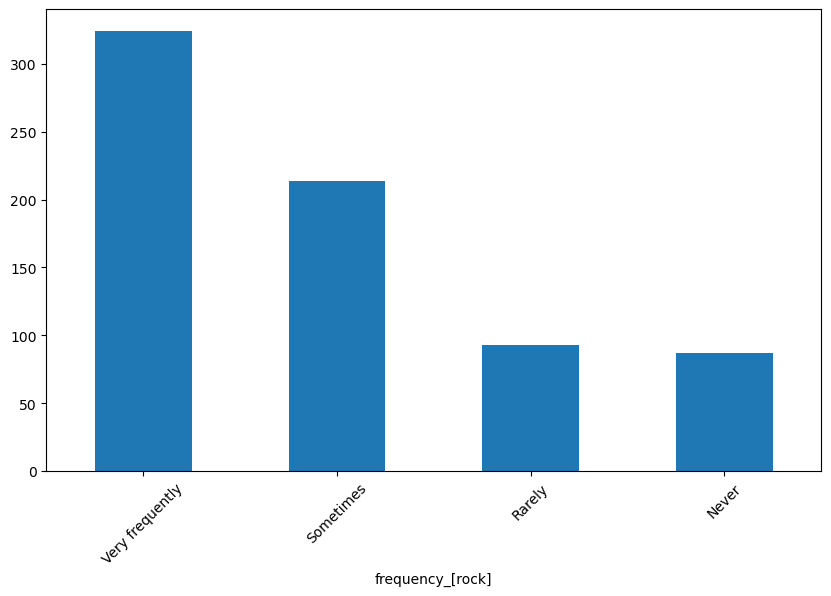

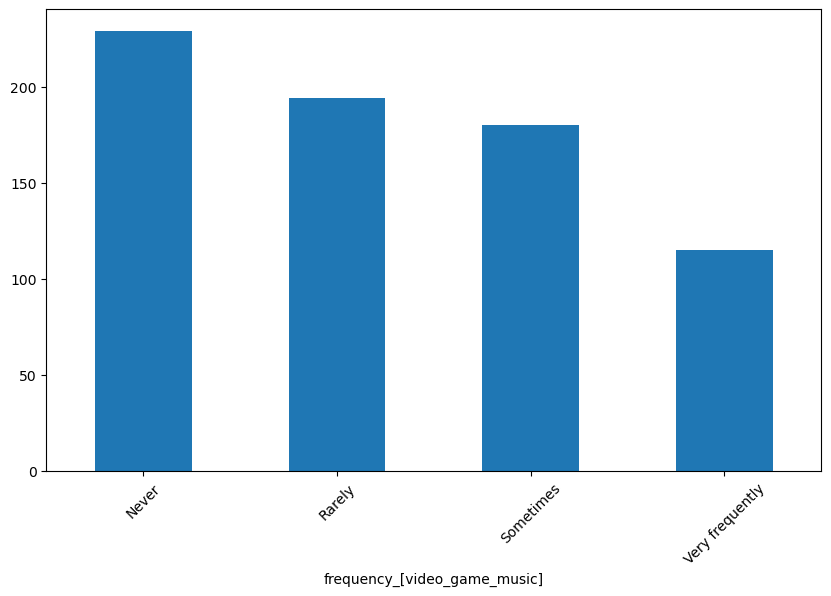

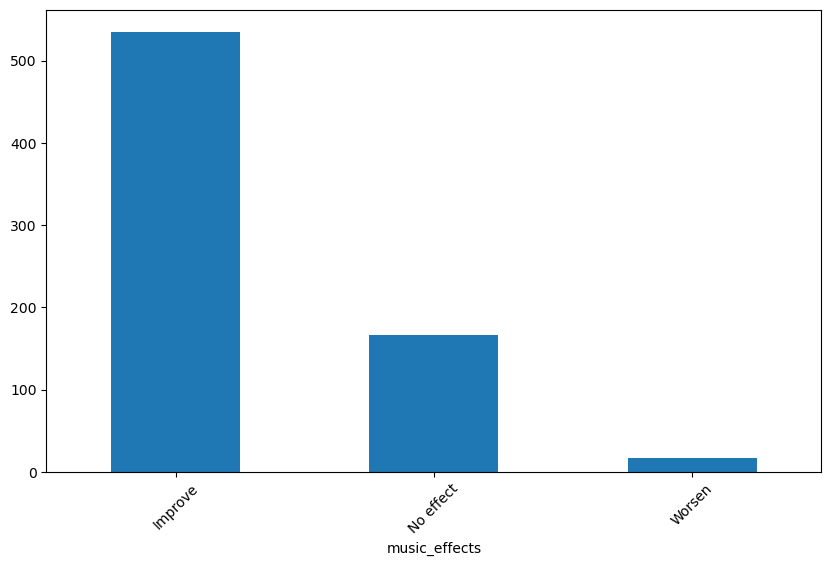

In [32]:
#plotting the categorical df
for col in catdata.columns:
    category_counts = catdata[col].value_counts()
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar')
    plt.xticks(rotation=45) 
    plt.show()

In [33]:
#encoding the categorical df
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(catdata)  
encoded = encoder.transform(catdata).toarray() 
encoded_columns = OneHotEncoder(drop='first').fit(catdata).get_feature_names_out(input_features=catdata.columns) 

onehot_encoded_X = pd.DataFrame(encoded, columns = encoded_columns) 
onehot_encoded_X.head()

,primary_streaming_service_Other,primary_streaming_service_Spotify,primary_streaming_service_YouTube Music,while_working_Yes,instrumentalist_Yes,composer_Yes,fav_genre_EDM,fav_genre_Hip hop,fav_genre_Jazz,fav_genre_Pop,fav_genre_Rock,frequency_[classical]_Rarely,frequency_[classical]_Sometimes,frequency_[classical]_Very frequently,frequency_[country]_Rarely,frequency_[country]_Sometimes,frequency_[country]_Very frequently,frequency_[edm]_Rarely,frequency_[edm]_Sometimes,frequency_[edm]_Very frequently,frequency_[folk]_Rarely,frequency_[folk]_Sometimes,frequency_[folk]_Very frequently,frequency_[gospel]_Rarely,frequency_[gospel]_Sometimes,frequency_[gospel]_Very frequently,frequency_[hip_hop]_Rarely,frequency_[hip_hop]_Sometimes,frequency_[hip_hop]_Very frequently,frequency_[jazz]_Rarely,frequency_[jazz]_Sometimes,frequency_[jazz]_Very frequently,frequency_[k_pop]_Rarely,frequency_[k_pop]_Sometimes,frequency_[k_pop]_Very frequently,frequency_[latin]_Rarely,frequency_[latin]_Sometimes,frequency_[latin]_Very frequently,frequency_[lofi]_Rarely,frequency_[lofi]_Sometimes,frequency_[lofi]_Very frequently,frequency_[metal]_Rarely,frequency_[metal]_Sometimes,frequency_[metal]_Very frequently,frequency_[pop]_Rarely,frequency_[pop]_Sometimes,frequency_[pop]_Very frequently,frequency_[r&b]_Rarely,frequency_[r&b]_Sometimes,frequency_[r&b]_Very frequently,frequency_[rap]_Rarely,frequency_[rap]_Sometimes,frequency_[rap]_Very frequently,frequency_[rock]_Rarely,frequency_[rock]_Sometimes,frequency_[rock]_Very frequently,frequency_[video_game_music]_Rarely,frequency_[video_game_music]_Sometimes,frequency_[video_game_music]_Very frequently,music_effects_No effect,music_effects_Worsen
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
concdata= pd.concat([onehot_encoded_X, X_numdata_scale ], axis=1)


In [35]:
concdata = concdata.dropna()

In [36]:
X=concdata.drop(['anxiety','depression','insomnia','ocd'], axis=1)
y1=concdata['anxiety']
y2=concdata['depression']
y3= concdata['insomnia']
y4= concdata['ocd']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error

X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test, y4_train, y4_test = train_test_split(X, y1, y2, y3, y4, test_size=0.2, random_state=42)




In [38]:
linreg=LinReg()    
linreg.fit(X_train, y1_train)
linreg.fit(X_train, y2_train)
linreg.fit(X_train, y3_train)
linreg.fit(X_train, y4_train)   
y_pred=linreg.predict(X_test) 

In [39]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y2_train),
                                            linreg.score(X_test, y2_test)))

train R2: -0.5514005889303908 -- test R2: -0.3710246855015962


In [40]:
mse_y1 = mean_squared_error(y1_test, y_pred)
mse_y2 = mean_squared_error(y2_test, y_pred)
mse_y3 = mean_squared_error(y3_test, y_pred)
mse_y4 = mean_squared_error(y4_test, y_pred)

print("Mean Squared Error for y1:", mse_y1)
print("Mean Squared Error for y2:", mse_y2)
print("Mean Squared Error for y3:", mse_y3)
print("Mean Squared Error for y4:", mse_y4)

Mean Squared Error for y1: 0.15468782682008175
Mean Squared Error for y2: 0.1327094042107667
Mean Squared Error for y3: 0.09711448328605632
Mean Squared Error for y4: 0.08669322629199334


**trying to reduce the categorical columns to improve the model** / (no improvement)

In [41]:

#concdata1= pd.concat([onehot_encoded_X[['fav_genre_Country','fav_genre_EDM','fav_genre_Folk','fav_genre_Gospel','fav_genre_Hip hop','fav_genre_Jazz','fav_genre_K pop','fav_genre_Latin','fav_genre_Lofi','fav_genre_Metal','fav_genre_Pop','fav_genre_R&B','fav_genre_Rap','fav_genre_Rock','fav_genre_Video game music']], X_numdata_scale ], axis=1)
#concdata1= concdata1.dropna()

In [42]:
#X=concdata1.drop(['anxiety','depression','insomnia','ocd'], axis=1)
#y1=concdata1['anxiety']
#y2=concdata1['depression']
#y3= concdata1['insomnia']
#y4= concdata1['ocd']

#y = np.column_stack((y1, y2, y3, y4))

In [43]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression as LinReg
#from sklearn.metrics import mean_squared_error

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
#linreg=LinReg()    
#linreg.fit(X_train, y_train)
#y_pred=linreg.predict(X_test) 

In [45]:
#print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            #linreg.score(X_test, y_test)))

In [46]:
#from sklearn.metrics import mean_squared_error as mse


#train_mse=mse(linreg.predict(X_train), y_train)
#test_mse=mse(linreg.predict(X_test), y_test)

#print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

In [47]:
#from sklearn.metrics import mean_absolute_error as mae

#train_mae=mae(linreg.predict(X_train), y_train)
#test_mae=mae(linreg.predict(X_test), y_test)

#print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

**encoding using mapping** (no improvement)

In [48]:
ordinal_mapping = {
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Very frequently': 4
}    
for column in catdata.columns:  
    if column.startswith('frequency_'):
        catdata[column] = catdata[column].map(ordinal_mapping)


In [49]:
ordinal_mapping1 = {
    'No effect': 0,
    'Improve': 1,
    'Worsen': -1
}    

catdata['music_effects'] = catdata['music_effects'].map(ordinal_mapping1)



In [50]:
mapping_dict = {
    'while_working': {
        'No': 0,
        'Yes': 1,
    },
    'instrumentalist': {
        'No': 0,
        'Yes': 1,
    },
    'composer': {
        'No': 0,
        'Yes': 1,
    
    }
}


for column, mapping in mapping_dict.items():
    catdata[column] = catdata[column].map(mapping)
    


**trying label encoding / onehotencoding for fav_genre and primary_streaming_service**

In [51]:
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()

#catdata['fav_genre'] = label_encoder.fit_transform(catdata['fav_genre'])

#trying onehotencoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')

# One-hot encode the 'primary_streaming_service' column
primary_streaming_encoded = encoder.fit_transform(catdata[['primary_streaming_service']]).toarray()
primary_streaming_columns = encoder.get_feature_names_out(['primary_streaming_service'])
primary_streaming_df = pd.DataFrame(primary_streaming_encoded, columns=primary_streaming_columns)

# One-hot encode the 'fav_genre' column
genre_encoded = encoder.fit_transform(catdata[['fav_genre']]).toarray()
genre_columns = encoder.get_feature_names_out(['fav_genre'])
genre_df = pd.DataFrame(genre_encoded, columns=genre_columns)

# Concatenate the original DataFrame with the encoded DataFrames
encoded_catdata = pd.concat([catdata, primary_streaming_df, genre_df], axis=1)
encoded_catdata.drop(['primary_streaming_service', 'fav_genre'], axis=1, inplace=True)
encoded_catdata

,while_working,instrumentalist,composer,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],music_effects,primary_streaming_service_Other,primary_streaming_service_Spotify,primary_streaming_service_YouTube Music,fav_genre_EDM,fav_genre_Hip hop,fav_genre_Jazz,fav_genre_Pop,fav_genre_Rock
2,0.0,0.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,4.0,1.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,4.0,1.0,4.0,3.0,3.0,1.0,3.0,4.0,4.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,1.0,0.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
encoded_catdata = encoded_catdata.dropna()

In [53]:
encoded_catdata

,while_working,instrumentalist,composer,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],music_effects,primary_streaming_service_Other,primary_streaming_service_Spotify,primary_streaming_service_YouTube Music,fav_genre_EDM,fav_genre_Hip hop,fav_genre_Jazz,fav_genre_Pop,fav_genre_Rock
2,0.0,0.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,4.0,1.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,4.0,1.0,4.0,3.0,3.0,1.0,3.0,4.0,4.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,1.0,0.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,1.0,0.0,0.0,2.0,1.0,4.0,1.0,1.0,3.0,2.0,1.0,1.0,4.0,1.0,4.0,1.0,2.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
714,0.0,0.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
715,1.0,1.0,1.0,2.0,3.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
716,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,4.0,3.0,1.0,2.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
concmusic = pd.concat([numdata, encoded_catdata], axis=1)

#removing NaN rows
concmusic = concmusic.dropna()
concmusic

,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd,while_working,instrumentalist,composer,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],music_effects,primary_streaming_service_Other,primary_streaming_service_Spotify,primary_streaming_service_YouTube Music,fav_genre_EDM,fav_genre_Hip hop,fav_genre_Jazz,fav_genre_Pop,fav_genre_Rock
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0,0.0,0.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,4.0,1.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,4.0,1.0,4.0,3.0,3.0,1.0,3.0,4.0,4.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,18.0,5.0,86.0,8.0,8.0,7.0,7.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,18.0,3.0,66.0,4.0,8.0,6.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,17.0,8.0,95.0,5.0,2.0,4.0,7.0,1.0,0.0,0.0,2.0,1.0,4.0,1.0,1.0,3.0,2.0,1.0,1.0,4.0,1.0,4.0,1.0,2.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
714,29.0,1.0,163.0,9.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
715,21.0,4.0,97.0,4.0,6.0,3.0,4.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
716,17.0,1.0,137.0,9.0,8.0,4.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,4.0,3.0,1.0,2.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X=concmusic.drop(['anxiety','depression','insomnia','ocd'], axis=1)
y1=concmusic['anxiety']
y2=concmusic['depression']
y3= concmusic['insomnia']
y4= concmusic['ocd']

y = np.column_stack((y1, y2, y3, y4))

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error

X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test, y4_train, y4_test = train_test_split(X, y1, y2, y3, y4, test_size=0.2, random_state=42)


In [57]:
linreg=LinReg()    
linreg.fit(X_train, y1_train)
linreg.fit(X_train, y2_train)
linreg.fit(X_train, y3_train)
linreg.fit(X_train, y4_train)
y_pred=linreg.predict(X_test) 

In [58]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y1_train),
                                            linreg.score(X_test, y1_test)))

train R2: -1.338959718826016 -- test R2: -0.9220825984690115


In [59]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y2_train),
                                            linreg.score(X_test, y2_test)))

train R2: -0.5086074522279898 -- test R2: -0.4000364589020511


In [60]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y3_train),
                                            linreg.score(X_test, y3_test)))

train R2: -0.16502351214642497 -- test R2: -0.06727894721429872


In [61]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y4_train),
                                            linreg.score(X_test, y4_test)))

train R2: 0.06371332768492821 -- test R2: -0.05898406584350169


In [62]:
# no improvement in the model

**Hypothesis and testings**

In [63]:
#Hypothesis
#H0: there is no relationship between music favourite genre and mental health.
#H1: there is relationship between music favourite genre and mental health.

In [64]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

favorite_genres = music_mh['fav_genre'].unique()

for genre in favorite_genres:
    genre_data = music_mh[music_mh['fav_genre'] == genre]
    for col in ['depression', 'anxiety', 'ocd', 'insomnia']:
        scores = genre_data[col]

        t_stat, p_val = ttest_1samp(scores, 0)  
    
        print(f"result for {col} scores in {genre}:")
        print(f"T-stat: {t_stat}")
        print(f"P-val: {p_val}")
  
        alpha = 0.05
        if p_val < alpha:
            print("the mean score is significantly different from 0.")
        else:
            print("the mean score is not significantly different from 0.")
        print()

result for depression scores in Video game music:
T-stat: 11.043382592221626
P-val: 1.0225976403848093e-13
the mean score is significantly different from 0.

result for anxiety scores in Video game music:
T-stat: 15.288167948588947
P-val: 2.6641591839279807e-18
the mean score is significantly different from 0.

result for ocd scores in Video game music:
T-stat: 5.987916600399351
P-val: 4.91503128609366e-07
the mean score is significantly different from 0.

result for insomnia scores in Video game music:
T-stat: 7.558000654832423
P-val: 3.1710342765890504e-09
the mean score is significantly different from 0.

result for depression scores in Jazz:
T-stat: 5.953722239963694
P-val: 1.5710977829577268e-05
the mean score is significantly different from 0.

result for anxiety scores in Jazz:
T-stat: 8.318484423174185
P-val: 2.1364715056270998e-07
the mean score is significantly different from 0.

result for ocd scores in Jazz:
T-stat: 4.0400815754403565
P-val: 0.0008501043284834951
the mean s

In [65]:
#End 